# **Bioinformatics Project - Computational Drug Discovery [Part 2] Exploratory Data Analysis**

Juan Oliveira

Na **Parte 2**, realizaremos o Cálculo do Descritor e a Análise Exploratória de Dados.

Obs: "Um descritor molecular é o resultado de um procedimento matemático e lógico que converte informações químicas codificadas em uma representação simbólica de uma molécula, expressa como um número útil. Essa representação pode ser obtida por meio de experimentos padronizados."

---

## **Instalando conda e rdkit**
Nesta etapa, vamos instalar os pacotes essenciais: o Conda (gerenciador de pacotes de código aberto) e o RDKit (conjunto de ferramentas para quimioinformatica). Esses pacotes nos permitirão calcular os descritores moleculares para os compostos no conjunto de dados que compilamos na Parte 1. Já temos os dados da atividade biológica do banco de dados, incluindo os nomes das moléculas, IC50 e as notações correspondentes a essas moléculas, como informações sobre a estrutura química. Agora, na Parte 2, vamos calcular esses descritores moleculares com base nos dados mencionados anteriormente.



In [ ]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh # Faz o download do instalador do Miniconda
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh # Dá permissão de execução ao arquivo baixado
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local # Executa o instalador do Miniconda
! conda install -c rdkit rdkit -y # Usa o Conda para instalar o pacote RDKit a partir do canal rdkit
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/') # Adiciona o caminho para os pacotes instalados pelo Conda ao caminho de busca do Python

--2024-07-01 00:31:19--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.191.158, 104.16.32.241, 2606:4700::6810:bf9e, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.191.158|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M  95.6MB/s    in 0.8s    

2024-07-01 00:31:20 (95.6 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ | / - \ | done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-pac

## **Carregar dados de bioatividade**

In [ ]:
!pip install pandas --upgrade # Atualiza a biblioteca pandas para a versão mais recente
import pandas as pd # Importa a biblioteca pandas com o alias 'pd'

Requirement already up-to-date: pandas in /usr/local/lib/python3.7/site-packages (1.3.5)


In [ ]:
from google.colab import drive # Importando a biblioteca para montar o Google Drive
drive.mount('/content/gdrive', force_remount=True) # Montando o Google Drive (forçando a remontagem, se necessário)

proj_path = '/content/gdrive/MyDrive/Colab Notebooks/' # Especificando uma variável de caminho (caminho do projeto)

file_name2='bioactivity_data_preprocessed_VHC.csv' # Definindo o nome do arquivo a ser lido
df = pd.read_csv(proj_path + file_name2) # Lendo o arquivo CSV e armazenando os dados no DataFrame 'df'

Mounted at /content/gdrive


In [ ]:
df

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL32704,CCCC(NC(=O)[C@@H]1C[C@@H](OC(=O)N2CCc3ccccc3C2...,520.0,active
1,CHEMBL33248,CCCC(NC(=O)[C@@H]1C[C@@H](OC(=O)N2CCc3ccccc3C2...,220.0,active
2,CHEMBL285069,CCCC(NC(=O)[C@@H]1C[C@@H](OC(=O)N2CCc3ccccc3C2...,220.0,active
3,CHEMBL286124,CCCC(NC(=O)[C@@H]1C[C@@H](OC(=O)N2CCc3ccccc3C2...,420.0,active
4,CHEMBL285686,CCCC(NC(=O)[C@@H]1C[C@@H](OC(=O)N2CCc3ccccc3C2...,26.0,active
...,...,...,...,...
608,CHEMBL3126842,COc1ccc2c(c1)[C@@H]1C[C@]1(C(=O)N1C3CCC1CN(C)C...,164.0,active
609,CHEMBL3126842,COc1ccc2c(c1)[C@@H]1C[C@]1(C(=O)N1C3CCC1CN(C)C...,1.8,active
610,CHEMBL3126842,COc1ccc2c(c1)[C@@H]1C[C@]1(C(=O)N1C3CCC1CN(C)C...,19.9,active
611,CHEMBL3126842,COc1ccc2c(c1)[C@@H]1C[C@]1(C(=O)N1C3CCC1CN(C)C...,4.8,active


## **Calcular descritores de Lipinski**
Christopher Lipinski, um cientista da Pfizer, criou um conjunto de regras práticas para avaliar a **semelhança a medicamentos** dos compostos. Essa semelhança com o fármaco é baseada na Absorção, Distribuição, Metabolismo e Excreção (ADME), também conhecida como perfil farmacocinético. Lipinski analisou todos os medicamentos oralmente ativos aprovados pela FDA na formulação do que é conhecido como **Regra dos Cinco** ou **Regra de Lipinski**.

A Regra de Lipinski afirmava o seguinte:
* Peso molecular < 500 Dalton
* Coeficiente de partição octanol-água (LogP) < 5
* Doadores de ligação de hidrogênio < 5
* Aceitadores de ligação de hidrogênio < 10

OBS: Essas regras nos indicam a semelhança relativa do composto com uma droga. Elas avaliam se o composto pode ser absorvido pelo corpo, distribuído para os tecidos e órgãos apropriados, e se será metabolizado e eventualmente excretado.

Observação II: Essas regras foram desenvolvidas especificamente considerando a administração oral.

### **Importando as bibliotecas**

In [ ]:
import numpy as np # Importando a biblioteca numpy com o alias 'np'
!pip install rdKit # Instalando a biblioteca RDKit usando o gerenciador de pacotes pip
from rdkit import Chem # Importando módulos específicos da biblioteca RDKit
from rdkit.Chem import Descriptors, Lipinski

     |████████████████████████████████| 29.5 MB 1.3 MB/s 


### **Calcular descritores**

Os **descritores moleculares** são valores numéricos que expressam características de uma molécula com base em sua estrutura química. Eles são usados para representar e quantificar propriedades moleculares, permitindo a análise e comparação de compostos. Aqui estão alguns tipos comuns de descritores:

1. **Massa Molecular**:
   - A **massa molecular** é a soma das massas atômicas de todos os átomos em uma molécula. Ela pode ser calculada a partir da fórmula molecular usando a tabela periódica. Existem calculadoras online disponíveis para determinar a massa molecular de uma substância específica².

2. **Descritores 2D**:
   - Esses descritores são baseados na estrutura planar da molécula. Exemplos incluem o número de átomos, ligações, grupos funcionais e conectividade entre átomos.

3. **Descritores 3D**:
   - Esses descritores levam em consideração a geometria tridimensional da molécula. Alguns exemplos incluem volume, área de superfície, carga parcial, forma molecular e momentos dipolares.

4. **QSAR (Relações Quantitativas entre Estrutura e Atividade)**:
   - O QSAR envolve o cálculo de descritores moleculares para prever a atividade biológica ou propriedades de uma molécula. Ele estabelece relações matemáticas entre a estrutura e a atividade, permitindo a otimização de compostos líderes.

Em resumo, o cálculo de descritores moleculares é fundamental para entender as propriedades das moléculas e sua relação com atividades biológicas.

In [ ]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation
# ou seja, essa função e personalizada que foi inspirada no link a cima, e foi modificado para incluir os descritores para esta analise.
# recebendo como entrada a anotação smile, a seção smile contem informações quimicas (infomarmando os detalhes atomicos exatos da molecula).
# Essa informações serao utilzadas para a entrada dos dados para usar para calcular os descritores moileculares corretamente, ou seja, a regra de lipinski
def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

In [ ]:
df_lipinski = lipinski(df.canonical_smiles) # Calcula os descritores de Lipinski para as moléculas no DataFrame 'df'

### **Combinar os DataFrame**

Vamos dar uma olhada nos 2 DataFrames que serão combinados.

In [ ]:
df_lipinski # Impressão do DataFrame com os valores da regra de Lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,824.980,2.7491,4.0,10.0
1,810.953,2.7066,4.0,10.0
2,824.980,3.2676,4.0,10.0
3,760.893,1.6688,4.0,10.0
4,781.911,3.2731,3.0,10.0
...,...,...,...,...
608,659.853,4.6931,1.0,7.0
609,659.853,4.6931,1.0,7.0
610,659.853,4.6931,1.0,7.0
611,659.853,4.6931,1.0,7.0


OBS:

- **Peso Molecular (MW)**: Soma das massas atômicas dos átomos em uma molécula. Indica o tamanho da molécula.
- **LogP (Coeficiente de Partição Octanol-Água)**: Mede a afinidade por gordura da molécula. Influencia absorção e distribuição.
- **NumHDonors (Doadores de Hidrogênio)**: Conta átomos de hidrogênio ligados a nitrogênio, oxigênio ou enxofre. Afeta interações e solubilidade.
- **NumHAcceptors (Aceitadores de Hidrogênio)**: Conta átomos que podem aceitar ligações de hidrogênio. Também influencia solubilidade.

In [ ]:
df # Impressão do DataFrame com informações de identificação da molécula, forma canonica, valores normais e de bioatividade (ativo ou inativo)

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL32704,CCCC(NC(=O)[C@@H]1C[C@@H](OC(=O)N2CCc3ccccc3C2...,520.0,active
1,CHEMBL33248,CCCC(NC(=O)[C@@H]1C[C@@H](OC(=O)N2CCc3ccccc3C2...,220.0,active
2,CHEMBL285069,CCCC(NC(=O)[C@@H]1C[C@@H](OC(=O)N2CCc3ccccc3C2...,220.0,active
3,CHEMBL286124,CCCC(NC(=O)[C@@H]1C[C@@H](OC(=O)N2CCc3ccccc3C2...,420.0,active
4,CHEMBL285686,CCCC(NC(=O)[C@@H]1C[C@@H](OC(=O)N2CCc3ccccc3C2...,26.0,active
...,...,...,...,...
608,CHEMBL3126842,COc1ccc2c(c1)[C@@H]1C[C@]1(C(=O)N1C3CCC1CN(C)C...,164.0,active
609,CHEMBL3126842,COc1ccc2c(c1)[C@@H]1C[C@]1(C(=O)N1C3CCC1CN(C)C...,1.8,active
610,CHEMBL3126842,COc1ccc2c(c1)[C@@H]1C[C@]1(C(=O)N1C3CCC1CN(C)C...,19.9,active
611,CHEMBL3126842,COc1ccc2c(c1)[C@@H]1C[C@]1(C(=O)N1C3CCC1CN(C)C...,4.8,active


Depois de visualizado as duas tabelas, vamos combinar os 2 DataFrame

In [ ]:
df_combined = pd.concat([df,df_lipinski], axis=1) #serve para combinar os dados dos dois dataFrame

In [ ]:
df_combined # Impressão dos 2 data frames juntos

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL32704,CCCC(NC(=O)[C@@H]1C[C@@H](OC(=O)N2CCc3ccccc3C2...,520.0,active,824.980,2.7491,4.0,10.0
1,CHEMBL33248,CCCC(NC(=O)[C@@H]1C[C@@H](OC(=O)N2CCc3ccccc3C2...,220.0,active,810.953,2.7066,4.0,10.0
2,CHEMBL285069,CCCC(NC(=O)[C@@H]1C[C@@H](OC(=O)N2CCc3ccccc3C2...,220.0,active,824.980,3.2676,4.0,10.0
3,CHEMBL286124,CCCC(NC(=O)[C@@H]1C[C@@H](OC(=O)N2CCc3ccccc3C2...,420.0,active,760.893,1.6688,4.0,10.0
4,CHEMBL285686,CCCC(NC(=O)[C@@H]1C[C@@H](OC(=O)N2CCc3ccccc3C2...,26.0,active,781.911,3.2731,3.0,10.0
...,...,...,...,...,...,...,...,...
608,CHEMBL3126842,COc1ccc2c(c1)[C@@H]1C[C@]1(C(=O)N1C3CCC1CN(C)C...,164.0,active,659.853,4.6931,1.0,7.0
609,CHEMBL3126842,COc1ccc2c(c1)[C@@H]1C[C@]1(C(=O)N1C3CCC1CN(C)C...,1.8,active,659.853,4.6931,1.0,7.0
610,CHEMBL3126842,COc1ccc2c(c1)[C@@H]1C[C@]1(C(=O)N1C3CCC1CN(C)C...,19.9,active,659.853,4.6931,1.0,7.0
611,CHEMBL3126842,COc1ccc2c(c1)[C@@H]1C[C@]1(C(=O)N1C3CCC1CN(C)C...,4.8,active,659.853,4.6931,1.0,7.0


### **Converter IC50 para pIC50**
Para permitir que os dados de **IC50**(A IC50 (concentração inibitória média) é uma medida quantitativa que indica o nível de uma substância inibidora (como uma droga) necessário para inibir, in vitro, um determinado processo ou componente biológico em 50% da quantidade inicial), sejam distribuídos de maneira mais uniforme, converteremos **IC50** na escala logarítmica negativa, que é essencialmente **-log10(IC50)**.

Esta função personalizada pIC50() aceitará um DataFrame como entrada e irá:
* Pegue os valores IC50 da coluna ``standard_value`` e converta-os de nM para M multiplicando o valor por 10$^{-9}$
* Pegue o valor molar e aplique -log10
* Exclua a coluna ``standard_value`` e crie uma nova coluna ``pIC50``

OBS: foi feita a conversao de IC50 para pIC50, pois os valores de IC50 estao desiguais dos pontos dos dados, portanto para deixar a distribuição + uniforme teremos que aplicar uma transformação logaritmica negativa

In [ ]:
import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM para M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', axis=1)

    return x

Obs: Valores maiores que 100.000.000 serão fixados em 100.000.000, caso contrário, o valor logarítmico negativo se tornará negativo.

In [ ]:
df_combined.standard_value.describe() #Esse método fornece um resumo estatístico das colunas do DataFrame que foram combinados anteriormente

count        613.000000
mean       19122.992001
std        86482.321123
min            0.010000
25%            3.300000
50%           11.300000
75%          247.000000
max      1000000.000000
Name: standard_value, dtype: float64

Esse código está gerando uma descrição estatística resumida para a coluna "standard_value" do DataFrame `df_combined`.

- **Contagem (count)**: O número de valores não nulos na coluna.
- **Média (mean)**: A média aritmética dos valores.
- **Desvio Padrão (std)**: A dispersão dos valores em relação à média.
- **Valor Mínimo (min)**: O menor valor presente na coluna.
- **Percentil 25 (25%)**: O valor abaixo do qual 25% dos dados estão.
- **Percentil 50 (50%) ou Mediana**: O valor que divide os dados em duas partes iguais.
- **Percentil 75 (75%)**: O valor abaixo do qual 75% dos dados estão.
- **Valor Máximo (max)**: O maior valor presente na coluna.

Essas estatísticas ajudam a entender a distribuição dos valores na coluna "standard_value".

In [ ]:
-np.log10( (10**-9)* 100000000 )

1.0

Comentar o cálculo:

$$
\log_{10}\left(\frac{{10^{-9} \times 100000000}}{{1}}\right)
$$

1. Primeiro, multiplicamos \(10^{-9}\) por \(100000000\) para obter \(1\).
2. Em seguida, calculamos o logaritmo na base 10 desse resultado.

In [ ]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [ ]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', axis=1)

    return x

Primeiro aplicaremos a função norm_value() para que os valores na coluna standard_value sejam normalizados.

A normalização ajuda a evitar que variáveis com escalas muito diferentes dominem o modelo. Algoritmos de aprendizado de máquina, como regressão linear e redes neurais, podem se beneficiar da normalização, pois muitos deles assumem que os dados estão em uma escala similar.
Também facilita a interpretação dos coeficientes em modelos lineares.

In [ ]:
df_norm = norm_value(df_combined) # Normaliza os valores no DataFrame 'df_combined'
df_norm # Exibe o DataFrame resultante 'df_norm'

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL32704,CCCC(NC(=O)[C@@H]1C[C@@H](OC(=O)N2CCc3ccccc3C2...,active,824.980,2.7491,4.0,10.0,520.0
1,CHEMBL33248,CCCC(NC(=O)[C@@H]1C[C@@H](OC(=O)N2CCc3ccccc3C2...,active,810.953,2.7066,4.0,10.0,220.0
2,CHEMBL285069,CCCC(NC(=O)[C@@H]1C[C@@H](OC(=O)N2CCc3ccccc3C2...,active,824.980,3.2676,4.0,10.0,220.0
3,CHEMBL286124,CCCC(NC(=O)[C@@H]1C[C@@H](OC(=O)N2CCc3ccccc3C2...,active,760.893,1.6688,4.0,10.0,420.0
4,CHEMBL285686,CCCC(NC(=O)[C@@H]1C[C@@H](OC(=O)N2CCc3ccccc3C2...,active,781.911,3.2731,3.0,10.0,26.0
...,...,...,...,...,...,...,...,...
608,CHEMBL3126842,COc1ccc2c(c1)[C@@H]1C[C@]1(C(=O)N1C3CCC1CN(C)C...,active,659.853,4.6931,1.0,7.0,164.0
609,CHEMBL3126842,COc1ccc2c(c1)[C@@H]1C[C@]1(C(=O)N1C3CCC1CN(C)C...,active,659.853,4.6931,1.0,7.0,1.8
610,CHEMBL3126842,COc1ccc2c(c1)[C@@H]1C[C@]1(C(=O)N1C3CCC1CN(C)C...,active,659.853,4.6931,1.0,7.0,19.9
611,CHEMBL3126842,COc1ccc2c(c1)[C@@H]1C[C@]1(C(=O)N1C3CCC1CN(C)C...,active,659.853,4.6931,1.0,7.0,4.8


In [ ]:
df_norm.standard_value_norm.describe() # Calcula estatísticas descritivas para a coluna 'standard_value_norm'

count        613.000000
mean       19122.992001
std        86482.321123
min            0.010000
25%            3.300000
50%           11.300000
75%          247.000000
max      1000000.000000
Name: standard_value_norm, dtype: float64

In [ ]:
df_final = pIC50(df_norm) # Calcula os valores de pIC50 a partir dos valores normalizados
df_final # Exibe o DataFrame resultante

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL32704,CCCC(NC(=O)[C@@H]1C[C@@H](OC(=O)N2CCc3ccccc3C2...,active,824.980,2.7491,4.0,10.0,6.283997
1,CHEMBL33248,CCCC(NC(=O)[C@@H]1C[C@@H](OC(=O)N2CCc3ccccc3C2...,active,810.953,2.7066,4.0,10.0,6.657577
2,CHEMBL285069,CCCC(NC(=O)[C@@H]1C[C@@H](OC(=O)N2CCc3ccccc3C2...,active,824.980,3.2676,4.0,10.0,6.657577
3,CHEMBL286124,CCCC(NC(=O)[C@@H]1C[C@@H](OC(=O)N2CCc3ccccc3C2...,active,760.893,1.6688,4.0,10.0,6.376751
4,CHEMBL285686,CCCC(NC(=O)[C@@H]1C[C@@H](OC(=O)N2CCc3ccccc3C2...,active,781.911,3.2731,3.0,10.0,7.585027
...,...,...,...,...,...,...,...,...
608,CHEMBL3126842,COc1ccc2c(c1)[C@@H]1C[C@]1(C(=O)N1C3CCC1CN(C)C...,active,659.853,4.6931,1.0,7.0,6.785156
609,CHEMBL3126842,COc1ccc2c(c1)[C@@H]1C[C@]1(C(=O)N1C3CCC1CN(C)C...,active,659.853,4.6931,1.0,7.0,8.744727
610,CHEMBL3126842,COc1ccc2c(c1)[C@@H]1C[C@]1(C(=O)N1C3CCC1CN(C)C...,active,659.853,4.6931,1.0,7.0,7.701147
611,CHEMBL3126842,COc1ccc2c(c1)[C@@H]1C[C@]1(C(=O)N1C3CCC1CN(C)C...,active,659.853,4.6931,1.0,7.0,8.318759


**OBS: Trocamos os valores normalizados no lugar do IC50 para pIC50 em um nova coluna e excluiu a IC50**

In [ ]:
df_final.pIC50.describe()

count    613.000000
mean       7.422387
std        1.582476
min        3.000000
25%        6.607303
50%        7.946922
75%        8.481486
max       11.000000
Name: pIC50, dtype: float64

In [ ]:
file_name3='VHC_04_bioactivity_data_3class_pIC50.csv' # Define o nome do arquivo CSV como 'VHC_04_bioactivity_data_3class_pIC50.csv'
df_final.to_csv(proj_path + file_name3) # Exporta o DataFrame 'df_final' para um arquivo CSV no local especificado por 'proj_path' com o nome definido em 'file_name3'

### **Removendo a classe de bioatividade 'intermediária'**
Aqui, removeremos a classe ``intermediate`` do nosso conjunto de dados.
Pois queremos uma comparação simples de biotividade

In [ ]:
df_2class = df_final[df_final.bioactivity_class != 'intermediate'] # Filtra o DataFrame 'df_final' para excluir as linhas com a classe 'intermediate'
df_2class # Exibe o DataFrame resultante

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL32704,CCCC(NC(=O)[C@@H]1C[C@@H](OC(=O)N2CCc3ccccc3C2...,active,824.980,2.7491,4.0,10.0,6.283997
1,CHEMBL33248,CCCC(NC(=O)[C@@H]1C[C@@H](OC(=O)N2CCc3ccccc3C2...,active,810.953,2.7066,4.0,10.0,6.657577
2,CHEMBL285069,CCCC(NC(=O)[C@@H]1C[C@@H](OC(=O)N2CCc3ccccc3C2...,active,824.980,3.2676,4.0,10.0,6.657577
3,CHEMBL286124,CCCC(NC(=O)[C@@H]1C[C@@H](OC(=O)N2CCc3ccccc3C2...,active,760.893,1.6688,4.0,10.0,6.376751
4,CHEMBL285686,CCCC(NC(=O)[C@@H]1C[C@@H](OC(=O)N2CCc3ccccc3C2...,active,781.911,3.2731,3.0,10.0,7.585027
...,...,...,...,...,...,...,...,...
608,CHEMBL3126842,COc1ccc2c(c1)[C@@H]1C[C@]1(C(=O)N1C3CCC1CN(C)C...,active,659.853,4.6931,1.0,7.0,6.785156
609,CHEMBL3126842,COc1ccc2c(c1)[C@@H]1C[C@]1(C(=O)N1C3CCC1CN(C)C...,active,659.853,4.6931,1.0,7.0,8.744727
610,CHEMBL3126842,COc1ccc2c(c1)[C@@H]1C[C@]1(C(=O)N1C3CCC1CN(C)C...,active,659.853,4.6931,1.0,7.0,7.701147
611,CHEMBL3126842,COc1ccc2c(c1)[C@@H]1C[C@]1(C(=O)N1C3CCC1CN(C)C...,active,659.853,4.6931,1.0,7.0,8.318759


In [ ]:
file_name4='VHC_05_bioactivity_data_2class_pIC50.csv' # Define o nome do arquivo CSV como 'VHC_05_bioactivity_data_2class_pIC50.csv'
df_2class.to_csv(proj_path + file_name4) # Exporta o DataFrame 'df_2class' para um arquivo CSV no local especificado por 'proj_path' com o nome definido em 'file_name4'


---


## **Análise Exploratória de Dados (Análise Espacial Química) via descritores de Lipinski**
O espaço químico é uma área onde colocamos todas as moléculas possíveis. Cada ponto nesse espaço representa uma molécula diferente. Quando estudamos essas posições, podemos entender como as moléculas se relacionam e como funcionam. Isso ajuda na busca por novos medicamentos e no entendimento das interações químicas.

Uma analogia seria: O conceito de espaço químico nos permite visualizar a organização espacial dos compostos químicos. Imagine esse espaço como um universo, onde cada composto químico é como uma estrela. As moléculas ativas seriam comparadas a constelações, e foi criado um gráfico de constelações para analisar esses espaços químicos. Nesse gráfico, as moléculas ativas têm tamanhos maiores em comparação com as menos ativas. Essas áreas ocupadas pelos compostos com afinidade específica por receptores biológicos são chamadas de espaço químico.

**obs: Espaço Químico são areas ocupadas por compostos que apresentam afinidade específica por receptores biológicos.**

### **Importanto bibliotecas**

In [ ]:
!pip install seaborn # Essa linha instala a biblioteca Seaborn, que é usada para criar gráficos estatísticos e visualizações de dados.
!pip install matplotlib # estamos instalando a biblioteca Matplotlib, que também é usada para criar gráficos, mas oferece mais flexibilidade e controle sobre os detalhes visuais.
import seaborn as sns # Importamos a biblioteca Seaborn para o ambiente de trabalho, permitindo que usemos suas funções.
sns.set(style='ticks') # Define o estilo padrão para os gráficos Seaborn.
import matplotlib.pyplot as plt # Importa a biblioteca Matplotlib para o ambiente de trabalho, permitindo que usemos suas funções.

     |████████████████████████████████| 293 kB 1.4 MB/s 
     |████████████████████████████████| 11.2 MB 38.6 MB/s 
     |████████████████████████████████| 1.1 MB 7.1 MB/s 
     |████████████████████████████████| 103 kB 14.0 MB/s 
     |████████████████████████████████| 965 kB 34.8 MB/s 


### **Gráfico de frequência das 2 classes de bioatividade**

<ipython-input-25-80ac41a2643d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='bioactivity_class', data=df_2class, edgecolor='black', palette=colors) # Cria um gráfico de contagem para a coluna 'bioactivity_class' do DataFrame 'df_2class'.


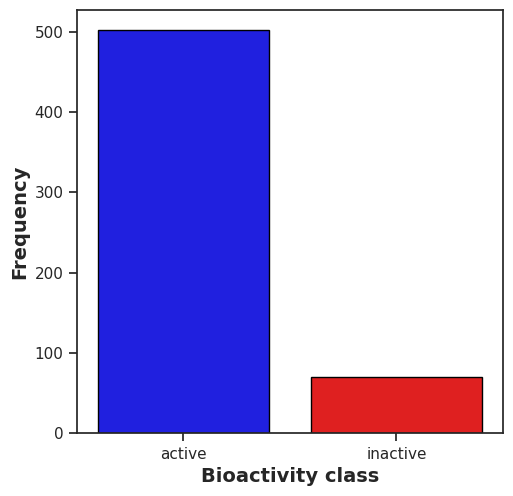

In [ ]:
colors = ["blue", "red"] # Define uma lista de cores para os gráficos.
plt.figure(figsize=(5.5, 5.5)) # Define o tamanho da figura em polegadas.

sns.countplot(x='bioactivity_class', data=df_2class, edgecolor='black', palette=colors) # Cria um gráfico de contagem para a coluna 'bioactivity_class' do DataFrame 'df_2class'.

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold') # Define os rótulos do eixo x e y.
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf') # Salva o gráfico em um arquivo PDF.

### **Gráfico de dispersão de MW (peso molecular) versus LogP (solubilidade)**

Observa-se que as 2 classes de bioatividade abrangem espaços químicos semelhantes, conforme evidenciado pelo gráfico de dispersão de MW vs LogP.

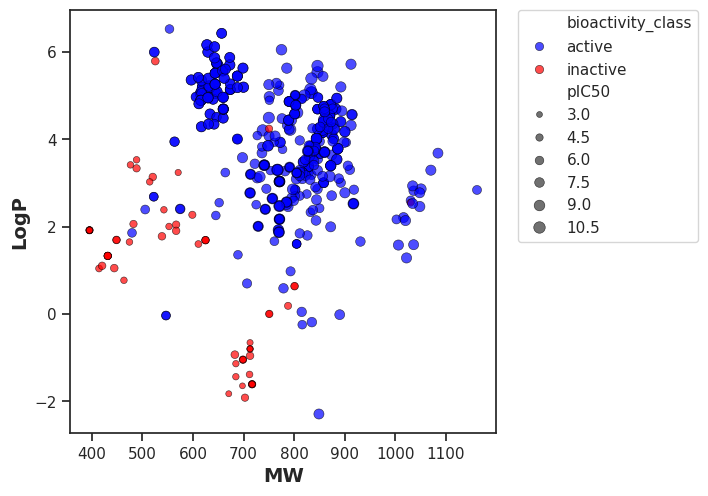

In [ ]:
colors = ["Blue", "red"] # Define uma lista de cores para os gráficos.
plt.figure(figsize=(5.5, 5.5)) # Define o tamanho da figura em polegadas.

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7, palette=colors) # Cria um gráfico de dispersão para as colunas 'MW' e 'LogP' do DataFrame 'df_2class'.

plt.xlabel('MW', fontsize=14, fontweight='bold') # Define os rótulos do eixo x e y.
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0) # Adiciona uma legenda ao gráfico.
plt.savefig('plot_MW_vs_LogP.pdf') # Salva o gráfico em um arquivo PDF.

### **Box plots**

#### **pIC50 value**

<ipython-input-27-33f68c7edbbd>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df_2class, palette=colors) # Cria um gráfico de caixa para a coluna 'pIC50' do DataFrame 'df_2class'.


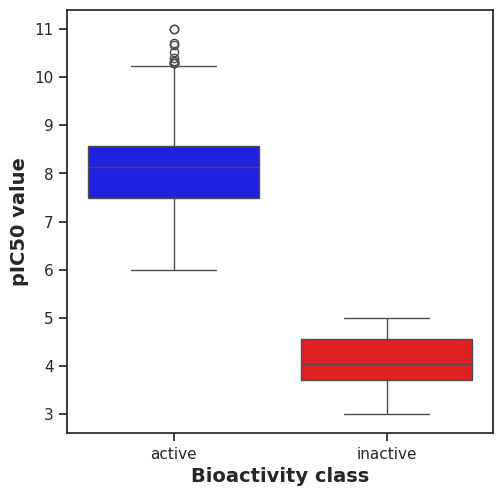

In [ ]:
colors = ["blue", "red"] # Define uma lista de cores para os gráficos.
plt.figure(figsize=(5.5, 5.5)) # Define o tamanho da figura em polegadas.

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df_2class, palette=colors) # Cria um gráfico de caixa para a coluna 'pIC50' do DataFrame 'df_2class'.

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold') # Define os rótulos do eixo x e y.
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf') # Salva o gráfico em um arquivo PDF.

**Statistical analysis | Mann-Whitney U Test**
Claro! Vou explicar de forma mais direta e pessoal:

O **Teste de Mann-Whitney U** é usado para comparar duas amostras independentes quando os dados não têm distribuição normal e o tamanho das amostras é pequeno (n < 30). Ele é uma alternativa não paramétrica ao teste t de duas amostras. Basicamente, ele avalia se as classificações das duas amostras diferem significativamente.

In [ ]:
def mannwhitney(descriptor, verbose=False):
  # Mann-Whitney U Test
  from numpy.random import seed # Importa a função seed do módulo numpy.random
  from numpy.random import randn # Importa a função randn do módulo numpy.random
  from scipy.stats import mannwhitneyu # Importa a função mannwhitneyu do módulo scipy.stats

  seed(1) # Define a semente para a geração de números aleatórios

# actives and inactives
  selection = [descriptor, 'bioactivity_class'] # Seleciona as colunas 'descriptor' e 'bioactivity_class' do DataFrame 'df_2class'
  df = df_2class[selection] # Seleciona as colunas 'descriptor' e 'bioactivity_class' do DataFrame 'df_2class'
  active = df[df.bioactivity_class == 'active'] # Filtra o DataFrame 'df' para selecionar as linhas com a classe 'active'
  active = active[descriptor] # Seleciona a coluna 'descriptor' do DataFrame 'active'

  selection = [descriptor, 'bioactivity_class'] # Seleciona as colunas 'descriptor' e 'bioactivity_class' do DataFrame 'df_2class'
  df = df_2class[selection] # Seleciona as colunas 'descriptor' e 'bioactivity_class' do DataFrame 'df_2class'
  inactive = df[df.bioactivity_class == 'inactive'] # Filtra o DataFrame 'df' para selecionar as linhas com a classe 'inactive'
  inactive = inactive[descriptor] # Seleciona a coluna 'descriptor' do DataFrame 'inactive'

# compare samples
  stat, p = mannwhitneyu(active, inactive) # Aplica o teste Mann-Whitney U à amostra ativa e inativa

# interpret
  alpha = 0.05 # Define o nível de significância
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)' # Se o valor-p for maior que o nível de significância, rejeita a hipótese nula
  else:
    interpretation = 'Different distribution (reject H0)' # Se o valor-p for menor ou igual ao nível de significância, rejeita a hipótese nula

  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv' # Define o nome do arquivo CSV
  results.to_csv(filename) # Exporta os resultados para um arquivo CSV

  return results # Retorna os resultados

In [ ]:
mannwhitney('pIC50') # Aplica o teste Mann-Whitney U à coluna 'pIC50' do DataFrame 'df_2class'

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,35140.0,6.537587e-42,0.05,Different distribution (reject H0)


Quando fazemos **testes de hipóteses**, estamos avaliando duas afirmações sobre uma população:

1. **Hipótese Nula (H0)**:
   - A **H0** é como uma "hipótese padrão". Ela assume que não há diferença real ou efeito acontecendo. Por exemplo, se estamos testando um novo medicamento, a **H0** diria que ele não faz diferença em comparação com um placebo.

2. **Hipótese Alternativa (HA)**:
   - A **HA** é o oposto da **H0**. Ela sugere que há uma diferença real ou efeito acontecendo. No exemplo do medicamento, a **HA** diria que o medicamento realmente funciona.

Agora, quando fazemos o teste, calculamos algo chamado **valor-p**. Se o **valor-p** for **muito pequeno** (geralmente menor que 0,05), rejeitamos a **H0**. Isso significa que temos evidências para acreditar na **HA**. Caso contrário, não rejeitamos a **H0** e consideramos que a **HA** não é verdadeira.

#### **MW** (igualdade das medianas)

<ipython-input-30-1cf01109cf0a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df_2class, palette=colors) # Cria um gráfico de caixa para a coluna 'MW' do DataFrame 'df_2class'.


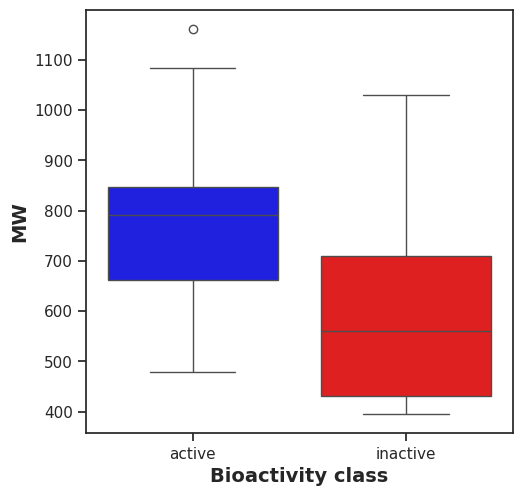

In [ ]:
colors = ["blue", "red"] # Define uma lista de cores para os gráficos.
plt.figure(figsize=(5.5, 5.5)) # Define o tamanho da figura em polegadas.

sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df_2class, palette=colors) # Cria um gráfico de caixa para a coluna 'MW' do DataFrame 'df_2class'.

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold') # Define os rótulos do eixo x e y.
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf') # Salva o gráfico em um arquivo PDF.

In [ ]:
mannwhitney('MW') # Aplica o teste Mann-Whitney U à coluna 'MW' do DataFrame 'df_2class'

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,30049.0,5.768796e-22,0.05,Different distribution (reject H0)


#### **LogP**

<ipython-input-32-6a1318d24033>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_2class, palette=colors) # Cria um gráfico de caixa para a coluna 'LogP' do DataFrame 'df_2class'.


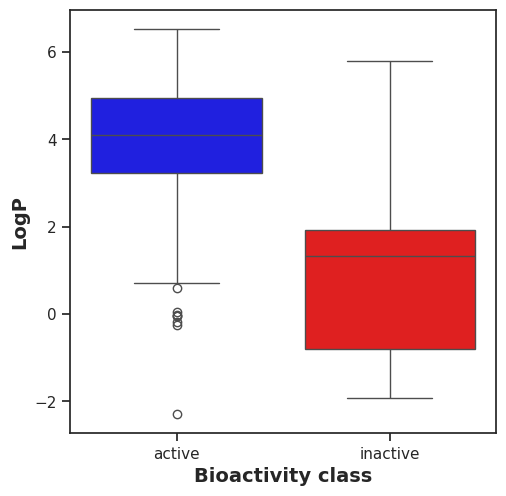

In [ ]:
colors = ["blue", "red"] # Define uma lista de cores para os gráficos.
plt.figure(figsize=(5.5, 5.5)) # Define o tamanho da figura em polegadas.

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_2class, palette=colors) # Cria um gráfico de caixa para a coluna 'LogP' do DataFrame 'df_2class'.

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold') # Define os rótulos do eixo x e y.
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf') # Salva o gráfico em um arquivo PDF.

**Statistical analysis | Mann-Whitney U Test**

In [ ]:
mannwhitney('LogP') # Aplica o teste Mann-Whitney U à coluna 'LogP' do DataFrame 'df_2class'

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,32748.0,1.041407e-31,0.05,Different distribution (reject H0)


#### **NumHDonors**

<ipython-input-34-681a87612d73>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_2class, palette=colors) # Cria um gráfico de caixa para a coluna 'NumHDonors' do DataFrame 'df_2class'.


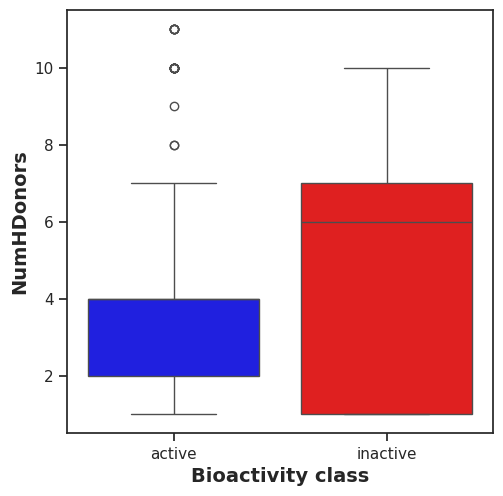

In [ ]:
colors = ["blue", "red"] # Define uma lista de cores para os gráficos.
plt.figure(figsize=(5.5, 5.5)) # Define o tamanho da figura em polegadas.

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_2class, palette=colors) # Cria um gráfico de caixa para a coluna 'NumHDonors' do DataFrame 'df_2class'.

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold') # Define os rótulos do eixo x e y.
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf') # Salva o gráfico em um arquivo PDF.

**Statistical analysis | Mann-Whitney U Test**

In [ ]:
mannwhitney('NumHDonors') # Aplica o teste Mann-Whitney U à coluna 'NumHDonors' do DataFrame 'df_2class'

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,12865.5,0.000131,0.05,Different distribution (reject H0)


#### **NumHAcceptors**

<ipython-input-36-614ee767cf38>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_2class, palette=colors) # Cria um gráfico de caixa para a coluna 'NumHAcceptors' do DataFrame 'df_2class'.


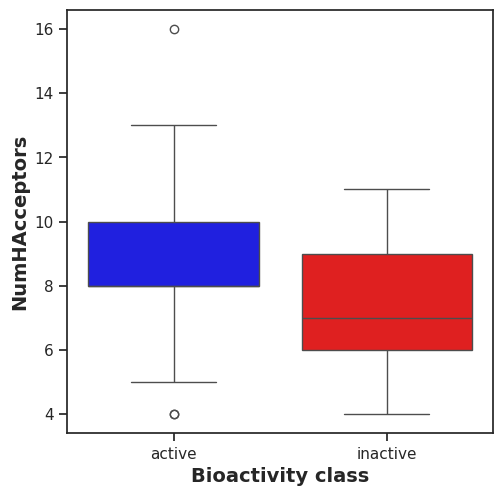

In [ ]:
colors = ["blue", "red"] # Define uma lista de cores para os gráficos.
plt.figure(figsize=(5.5, 5.5)) # Define o tamanho da figura em polegadas.

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_2class, palette=colors) # Cria um gráfico de caixa para a coluna 'NumHAcceptors' do DataFrame 'df_2class'.

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold') # Define os rótulos do eixo x e y.
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf') # Salva o gráfico em um arquivo PDF.

In [ ]:
mannwhitney('NumHAcceptors') # Aplica o teste Mann-Whitney U à coluna 'NumHAcceptors' do DataFrame 'df_2class'

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,24073.0,2.459101e-07,0.05,Different distribution (reject H0)


#### **Interpretation of Statistical Results**

##### **Box Plots**

###### **valores pIC50**

Observando os valores de pIC50, os **ativos** e **inativos** apresentaram ***diferença estatisticamente significativa***, o que é esperado uma vez que os valores limite (``IC50 < 1.000 nM = Ativos enquanto IC50 > 10.000 nM = Inativos``, correspondendo a ``pIC50 > 6 = Ativos e pIC50 < 5 = Inativos``) foram usados ​​para definir ativos e inativos.

###### **Descritores de Lipinski**

Dos 4 descritores de Lipinski (MW, LogP, NumHDonors e NumHAcceptors), apenas LogP exibiu ***nenhuma diferença*** entre os **ativos** e **inativos** enquanto os outros 3 descritores (MW, NumHDonors e NumHAcceptores ) mostra ***diferença estatisticamente significativa*** entre **ativos** e **inativos**.

## **Zip files**

In [ ]:
! zip -r results.zip . -i *.csv *.pdf

Scanning files .
  adding: mannwhitneyu_NumHDonors.csv (deflated 11%)
  adding: mannwhitneyu_NumHAcceptors.csv (deflated 10%)
  adding: plot_MW_vs_LogP.pdf (deflated 6%)
  adding: plot_ic50.pdf (deflated 36%)
  adding: mannwhitneyu_pIC50.csv (deflated 10%)
  adding: plot_LogP.pdf (deflated 39%)
  adding: mannwhitneyu_LogP.csv (deflated 8%)
  adding: plot_NumHAcceptors.pdf (deflated 37%)
  adding: plot_NumHDonors.pdf (deflated 37%)
  adding: mannwhitneyu_MW.csv (deflated 8%)
  adding: plot_MW.pdf (deflated 38%)
  adding: plot_bioactivity_class.pdf (deflated 38%)
